In [74]:
import pandas as pd
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('seaborn-whitegrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Set max columns
pd.set_option('display.max_columns', None)

DATADIR = '../data/2020'
OTHERDIR = '../data/misc/'

# Set paths
DATASET = os.path.join(DATADIR, '2020pp.csv')
HIERARCHY = os.path.join(OTHERDIR, 'hierarchy.xlsx')

# **Análisis y ploteo de datos**

In [3]:
df = pd.read_csv(DATASET, index_col=[0])

/usr/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (6,7,8,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df

,AUDI,DECL,DPTO,ELE,GVD,INC,INOFFDPTO,INOFFUSI,LOC,MADU,PJI,RETO,TALL,TIPO,UET,ZONA
0,CAPS,2020-01-27 09:00:00.000000,NaN,4120,V2,0180,NaN,NaN,NaN,NaN,655200530232,NaN,NaN,NaN,NaN,NaN
1,CAPS,2020-01-27 09:00:00.000000,NaN,4466,V2,1010,NaN,NaN,NaN,NaN,655200420197,NaN,NaN,NaN,NaN,NaN
2,CAPS,2020-01-27 09:00:00.000000,NaN,4420,V2,1110,NaN,NaN,NaN,NaN,655200450172,NaN,NaN,NaN,NaN,NaN
3,CAPS,2020-01-27 09:00:00.000000,NaN,4412,V2,1180,NaN,NaN,NaN,NaN,655200450172,NaN,NaN,NaN,NaN,NaN
4,CAPS,2020-01-27 09:00:00.000000,NaN,4414,V2,1270,NaN,NaN,NaN,NaN,655200420197,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235533,PESD,2020-12-30 09:06:00,PINT,4502,V2,1000,NaN,NaN,GRAL,NaN,655210140012,NaN,SERVP,ASP,DIP,PESD
235534,PESD,2020-12-30 10:03:00,SOLD,7887,V2,3220,NaN,NaN,NaN,NaN,655210140033,NaN,TOLE4,GMTR,659,PESD
235535,PESD,2020-12-30 10:03:00,MONT,5215,V2,4450,NaN,NaN,K74,NaN,655210140033,NaN,CH-ME,NCON,654,PESD
235536,PESD,2020-12-30 10:03:00,PINT,4401,V2,1190,NaN,NaN,H54,NaN,655210140033,NaN,PTAL2,ASP,483,PESD


In [8]:
# Total cars in 2020
df[df.MADU.notna()]['PJI'].nunique()

10780

In [9]:
# Unique defects
(df.ELE.astype(str)+df.INC.astype(str)).nunique()

5224

In [10]:
# Defects per car
len(df)/df['PJI'].nunique()

19.582183614375744

In [12]:
# Set ID for each default
df['ID'] = range(1, len(df) + 1)

# **Pie plots**

<AxesSubplot:ylabel='ID'>

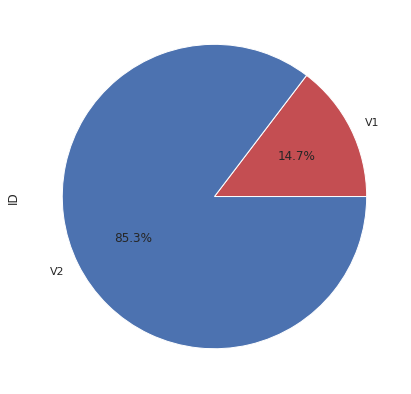

In [48]:
# V1 vs V2
df.groupby('GVD').count()['ID'].plot.pie(autopct='%1.1f%%', colors=['r','b'], figsize=(7,7))

<AxesSubplot:ylabel='ID'>

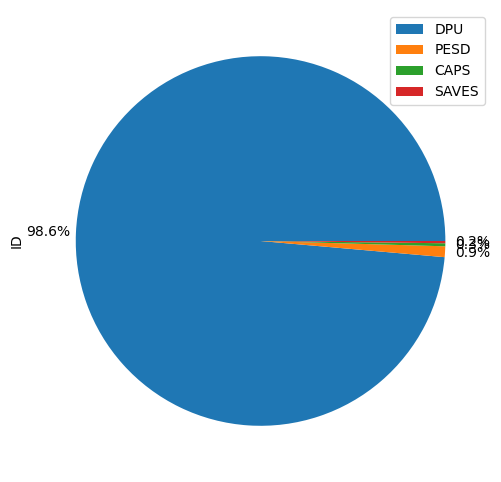

In [192]:
v1 = df[df.GVD=='V1']
df.groupby('AUDI').count()['ID'].sort_values(ascending=False).plot.pie(autopct='%1.1f%%',figsize=(6,6), legend=True, pctdistance=1.15, labels=None)

In [167]:
v1

,V1
DECL,
2020-01-02,10
2020-01-03,0
2020-01-04,0
2020-01-05,0
2020-01-06,26
...,...
2020-12-26,0
2020-12-27,0
2020-12-28,138


<AxesSubplot:ylabel='ID'>

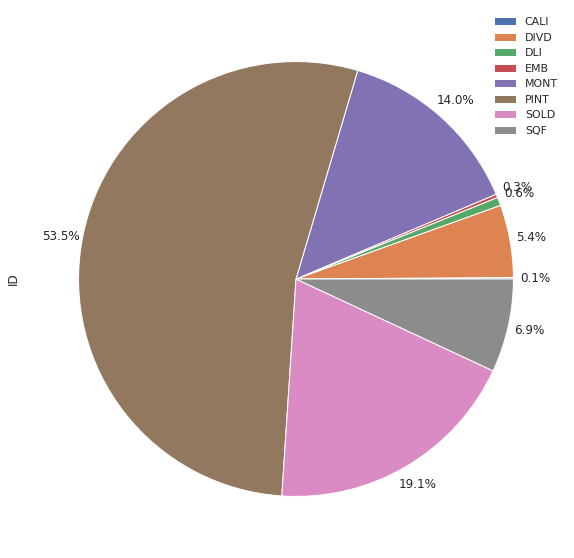

In [49]:
# Defects distribution per dpto
df.groupby('DPTO').count()['ID'].plot.pie(autopct='%1.1f%%',figsize=(10,10), legend=True, pctdistance=1.1, labels=None)

<AxesSubplot:ylabel='ID'>

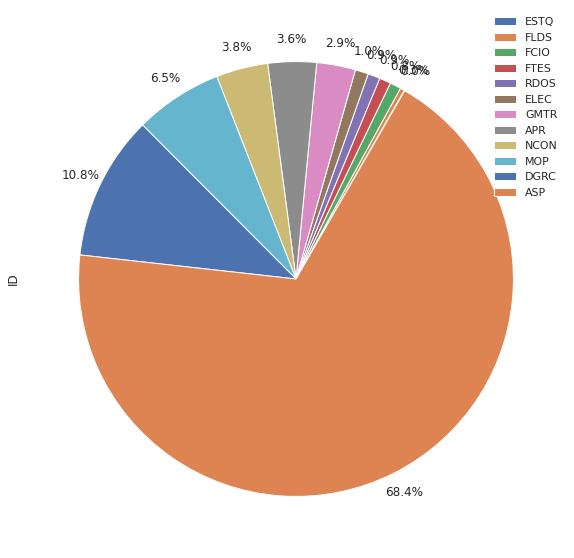

In [50]:
# Defects distribution per type
df.groupby('TIPO').count()['ID'].sort_values().plot.pie(autopct='%1.1f%%',figsize=(10,10), pctdistance=1.1, legend=True, labels=None, startangle=60)

In [203]:
df_temp = df[df.INOFFUSI=='OFF']

<AxesSubplot:xlabel='DECL'>

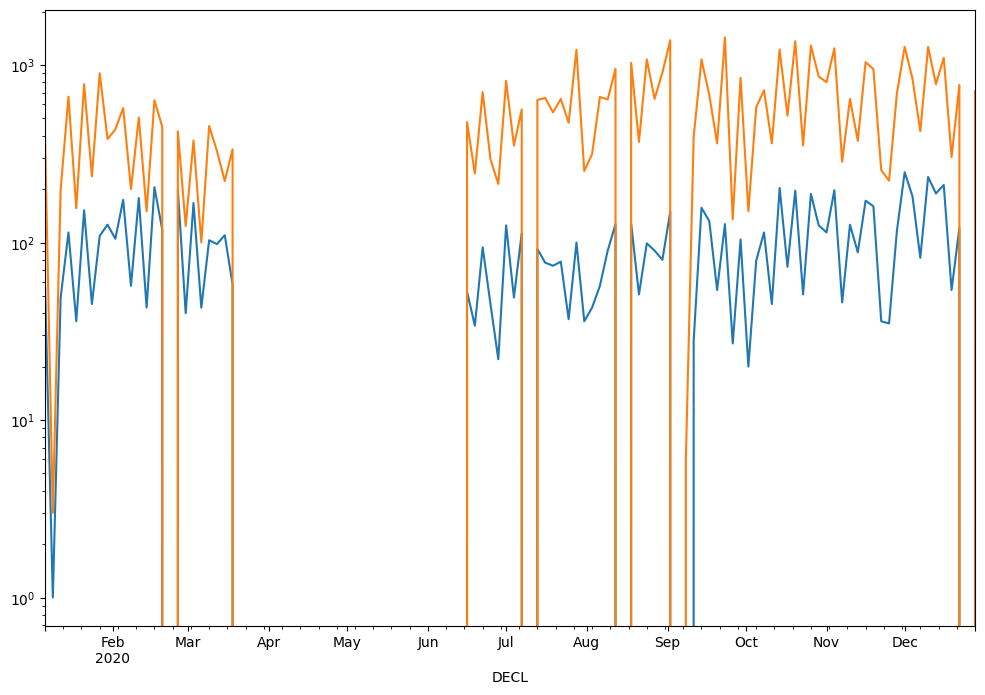

In [218]:
df_temp[df_temp.GVD=='V1'].resample('3D').count()['AUDI'].plot(figsize=(12,8), logy=True)
df_temp[df_temp.GVD=='V2'].resample('3D').count()['AUDI'].plot(figsize=(12,8))

<AxesSubplot:ylabel='ID'>

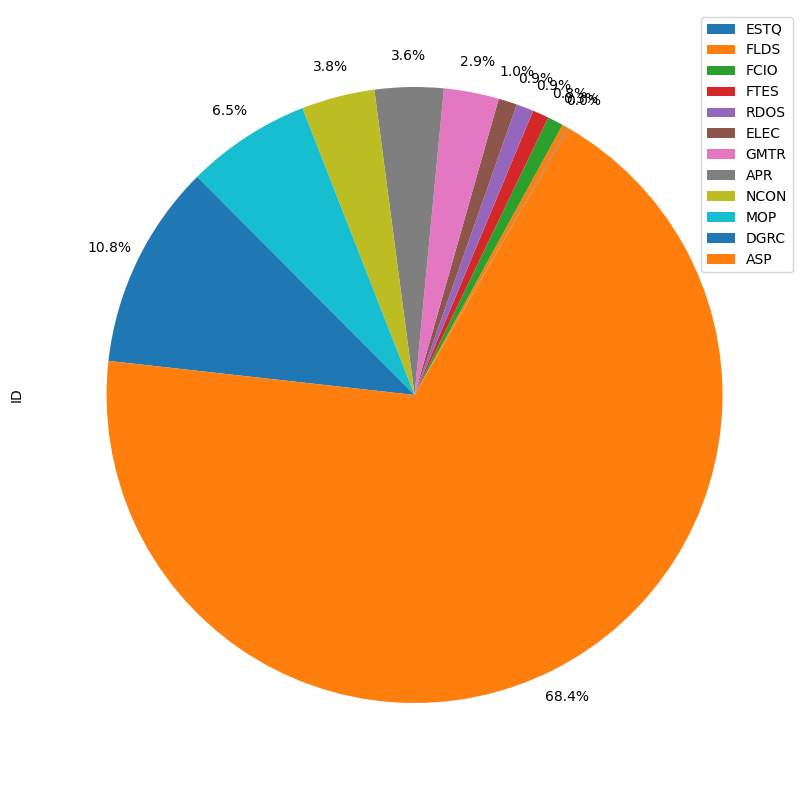

In [193]:


df.groupby('TIPO').count()['ID'].sort_values().plot.pie(autopct='%1.1f%%',figsize=(10,10), pctdistance=1.1, legend=True, labels=None, startangle=60)

# **Mapas de calor**

## Cantidad de defectos DPTO vs TIPO

<AxesSubplot:xlabel='TIPO', ylabel='DPTO'>

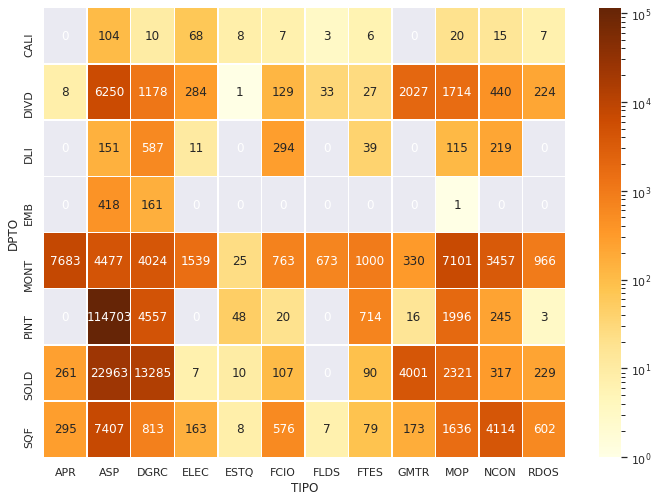

In [55]:
from matplotlib.colors import LogNorm

sns.heatmap(pd.crosstab([df.DPTO], [df.TIPO]), norm=LogNorm(), annot=True, cmap='YlOrBr', fmt="d", linewidths=.5)

In [107]:
v1 = df[df.GVD=='V1']
v2 = df[df.GVD=='V2']

In [112]:
v1cross = pd.crosstab([v1.DPTO], [v1.TIPO])
v2cross = pd.crosstab([v2.DPTO], [v2.TIPO])

In [118]:
mindef = 30
v2cross = v2cross[v2cross>mindef]
v1cross = v1cross[v2cross>mindef]

In [119]:
v1v2pct = v1cross / (v1cross + v2cross)

In [38]:
v1v2pct = pd.crosstab([v1.DPTO], [v1.TIPO])/(pd.crosstab([v1.DPTO], [v1.TIPO])+pd.crosstab([v2.DPTO], [v2.TIPO]))
v1v2pct.fillna(0)

TIPO,APR,ASP,DGRC,ELEC,ESTQ,FCIO,FLDS,FTES,GMTR,MOP,NCON,RDOS
DPTO,,,,,,,,,,,,
CALI,0.000000,0.048077,0.300000,0.088235,0.375000,0.428571,0.666667,0.833333,0.000000,0.300000,0.533333,0.000000
DIVD,0.000000,0.050400,0.229202,0.073944,1.000000,0.046512,0.303030,0.037037,0.021214,0.067095,0.084091,0.160714
DLI,0.000000,0.086093,0.105622,0.181818,0.000000,0.017007,0.000000,0.794872,0.000000,0.234783,0.164384,0.000000
EMB,0.000000,0.033493,0.037267,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MONT,0.001952,0.080858,0.245527,0.084470,0.600000,0.342071,0.129272,0.785000,0.160606,0.246022,0.228233,0.315735
PINT,0.000000,0.180754,0.206057,0.000000,0.770833,0.150000,0.000000,0.142857,0.125000,0.212926,0.212245,1.000000
SOLD,0.007663,0.036406,0.122243,0.285714,0.100000,0.074766,0.000000,0.488889,0.047238,0.161137,0.252366,0.161572
SQF,0.145763,0.044822,0.163592,0.226994,0.375000,0.163194,0.571429,0.696203,0.028902,0.096577,0.070734,0.558140


## Porcentaje de V1s por cantidad de defectos

<AxesSubplot:xlabel='TIPO', ylabel='DPTO'>

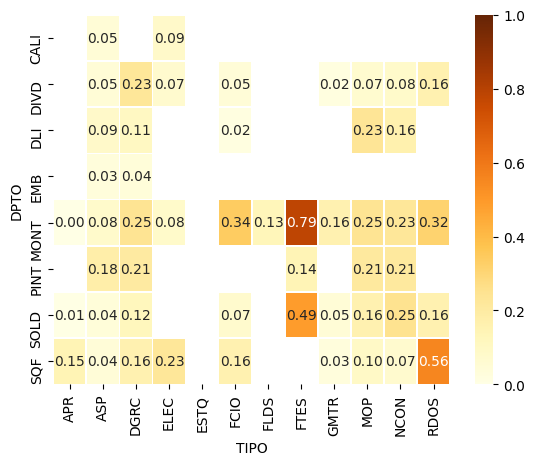

In [131]:
sns.heatmap(v1v2pct, annot=True, cmap='YlOrBr', fmt='.2f',linewidths=.5, vmin=0, vmax=1, robust=True)

<AxesSubplot:xlabel='TIPO', ylabel='DPTO-TALL-UET'>

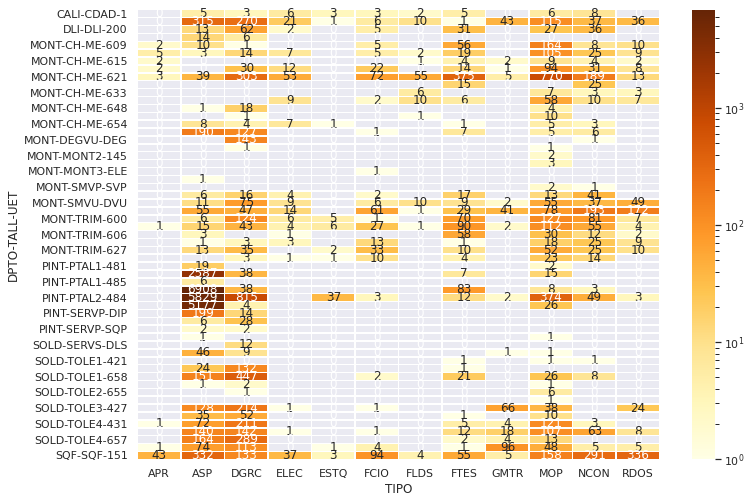

In [59]:
sns.heatmap(pd.crosstab([v1.DPTO, v1.TALL, v1.UET], [v1.TIPO]), norm=LogNorm(), annot=True, cmap='YlOrBr', fmt="d", linewidths=.5)

In [66]:
(len(df.PJI.unique())*3000000)/160

220162500.0

<AxesSubplot:>

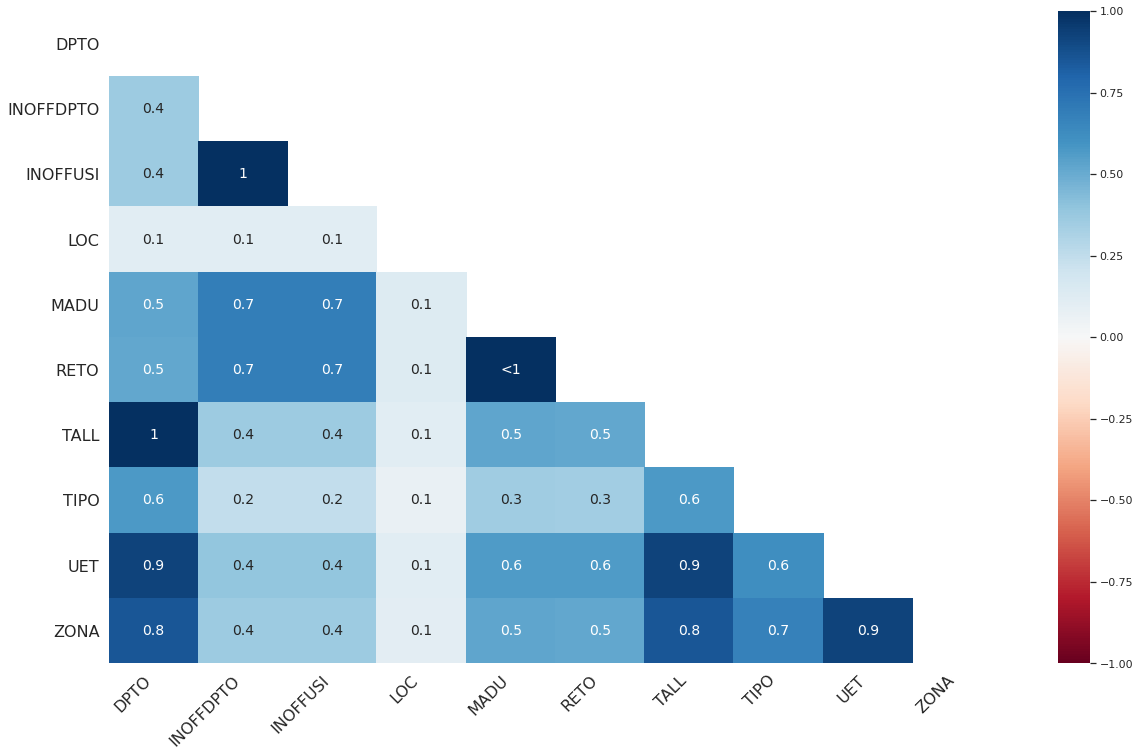

In [67]:
msno.heatmap(df)

In [70]:
# Set date as datetimeindex
df['DECL'] = pd.to_datetime(df['DECL'])
df[df['DECL']>='2020-01-01']
df.set_index('DECL', inplace=True)

In [49]:
colorsdpto = {'CALI':'white', 'MONT':'goldenrod', 'SOLD':'skyblue', 'PINT':'limegreen', 'SQF':'orange', 'DLI':'lightblue', 'DIVD':'black'}

In [53]:
colors = list(colorsdpto.values())

In [71]:
df['TIMERETO'] = (pd.to_datetime(df['RETO']) - df.index).dt.total_seconds()/3600

In [72]:
df['TIMERETOLOG'] = np.log((pd.to_datetime(df['RETO']) - df.index).dt.total_seconds())/3600

/home/gerac/.local/lib/python3.9/site-packages/pandas/core/arraylike.py:274: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/gerac/.local/lib/python3.9/site-packages/pandas/core/arraylike.py:274: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

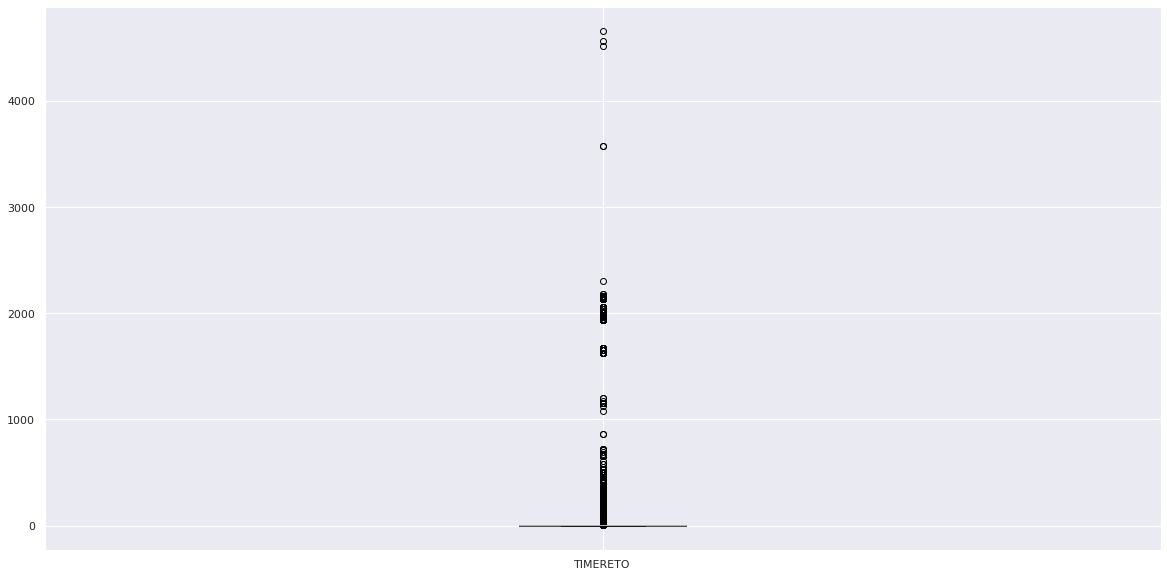

In [73]:
df[df.TIMERETO>0].boxplot(column=['TIMERETO'], figsize=(20,10))

In [13]:


def normalize(df, col: str):
    return df[np.abs(stats.zscore(df[col]))<3]

In [36]:
dftimereto = df[df.TIMERETO>0]

In [37]:
len(dftimereto)

192754

In [38]:
# Normalize via z-score
dftimereto = dftimereto[np.abs(stats.zscore(dftimereto.TIMERETO))<3]

<AxesSubplot:title={'center':'TIMERETO'}, xlabel='DPTO'>

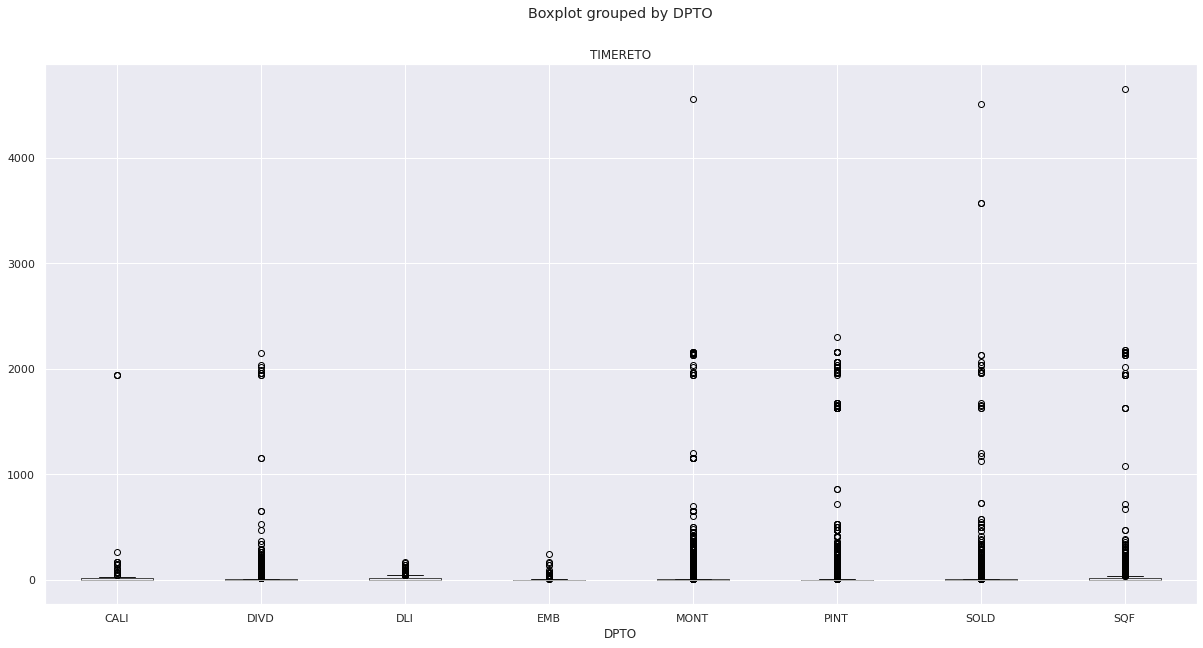

In [39]:
df[df.TIMERETO>0].boxplot(column=['TIMERETO'], by='DPTO', figsize=(20,10))

<AxesSubplot:title={'center':'TIMERETO'}, xlabel='DPTO'>

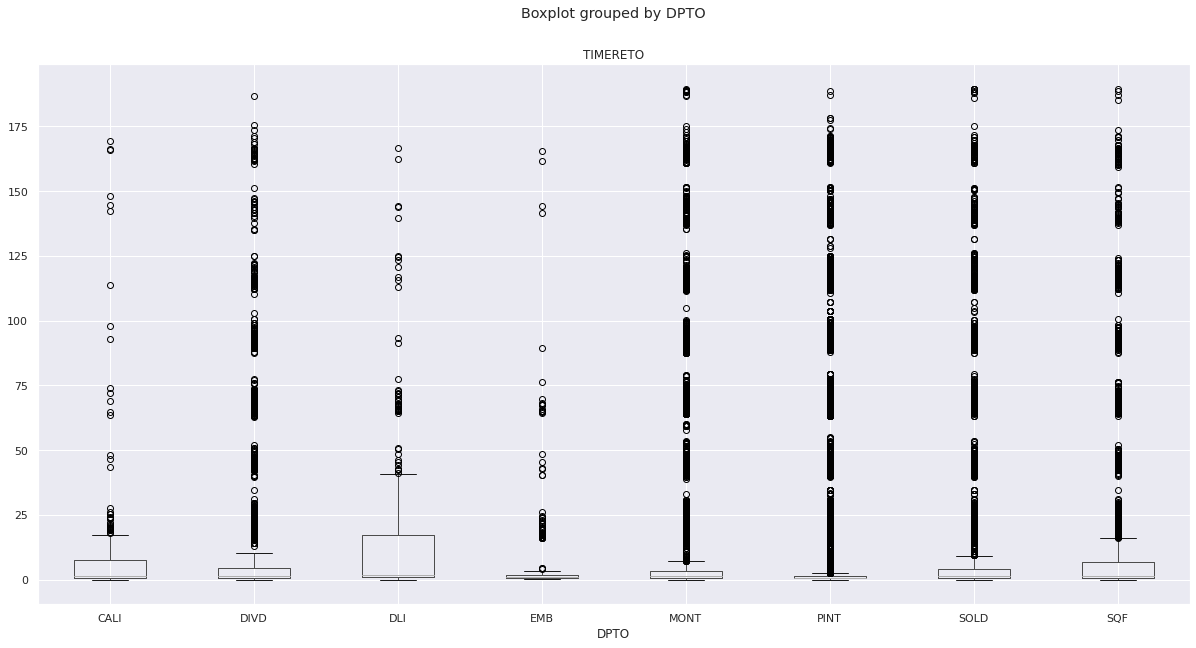

In [40]:
dftimereto[dftimereto.TIMERETO>0].boxplot(column=['TIMERETO'], by='DPTO', figsize=(20,10))

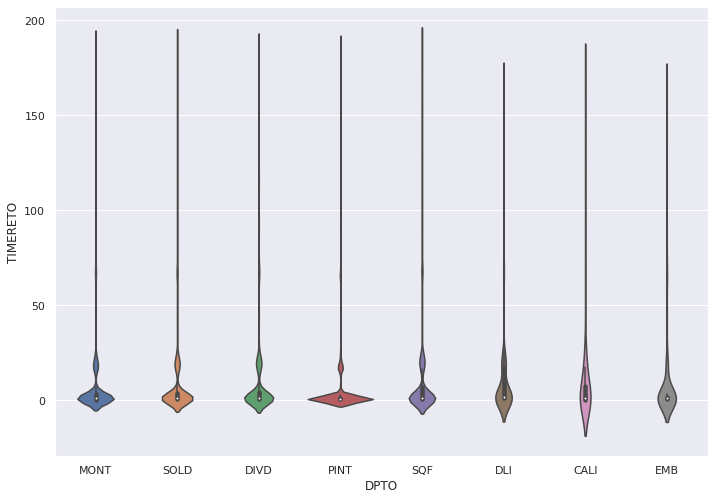

In [42]:
#df_temp = dftimereto[df['TIMERETO']>0]
ax = sns.violinplot(x="DPTO", y="TIMERETO", data=dftimereto)#, palette=colors)

<AxesSubplot:xlabel='DPTO'>

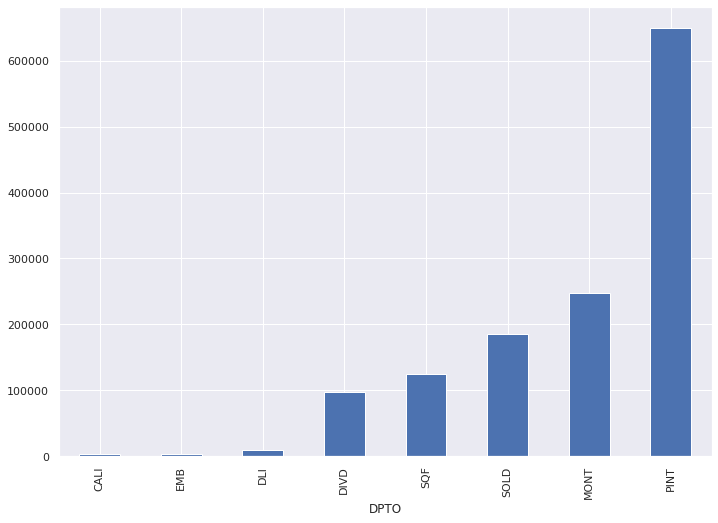

In [43]:
dftimereto.groupby('DPTO').sum()['TIMERETO'].sort_values().plot(kind='bar')

<AxesSubplot:xlabel='TIPO'>

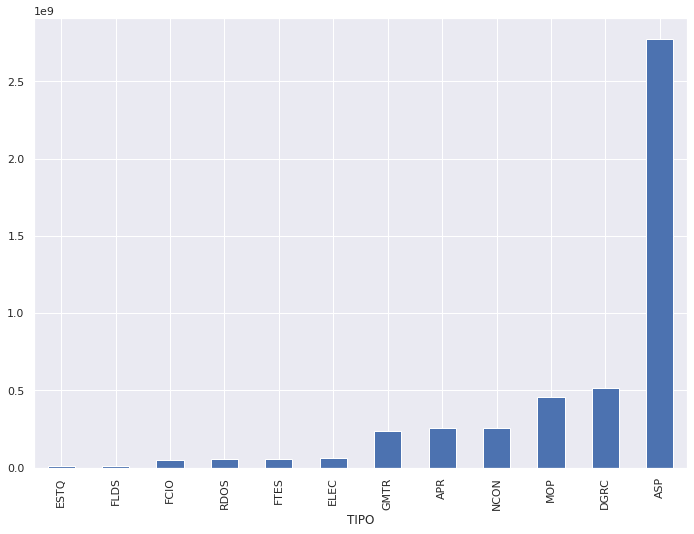

In [32]:
dftimereto.groupby('TIPO').sum()['TIMERETO'].sort_values().plot(kind='bar')

# **Time plotting**

In [148]:
df = df[(df.index>='2020-01-01')]

In [153]:
freq = 'D'
v1 = df[df['GVD']=='V1'].resample(freq).count()['ID'].to_frame().rename(columns={'ID':'V1'})
v2 = df[df['GVD']=='V2'].resample(freq).count()['ID'].to_frame().rename(columns={'ID':'V2'})

In [154]:
v2 = v2[v2.index>'2020-01-01']
total = v2.join(v1)

In [155]:
import datetime

covid_quarantine_start = datetime.datetime.strptime('2020-03-19', '%Y-%m-%d')
covid_quarantine_texttime = datetime.datetime.strptime('2020-03-22', '%Y-%m-%d')

def get_timeplot(mydate: str):
    return datetime.datetime.strptime(mydate, '%Y-%m-%d')

# Defectos agrupados por medida de tiempo

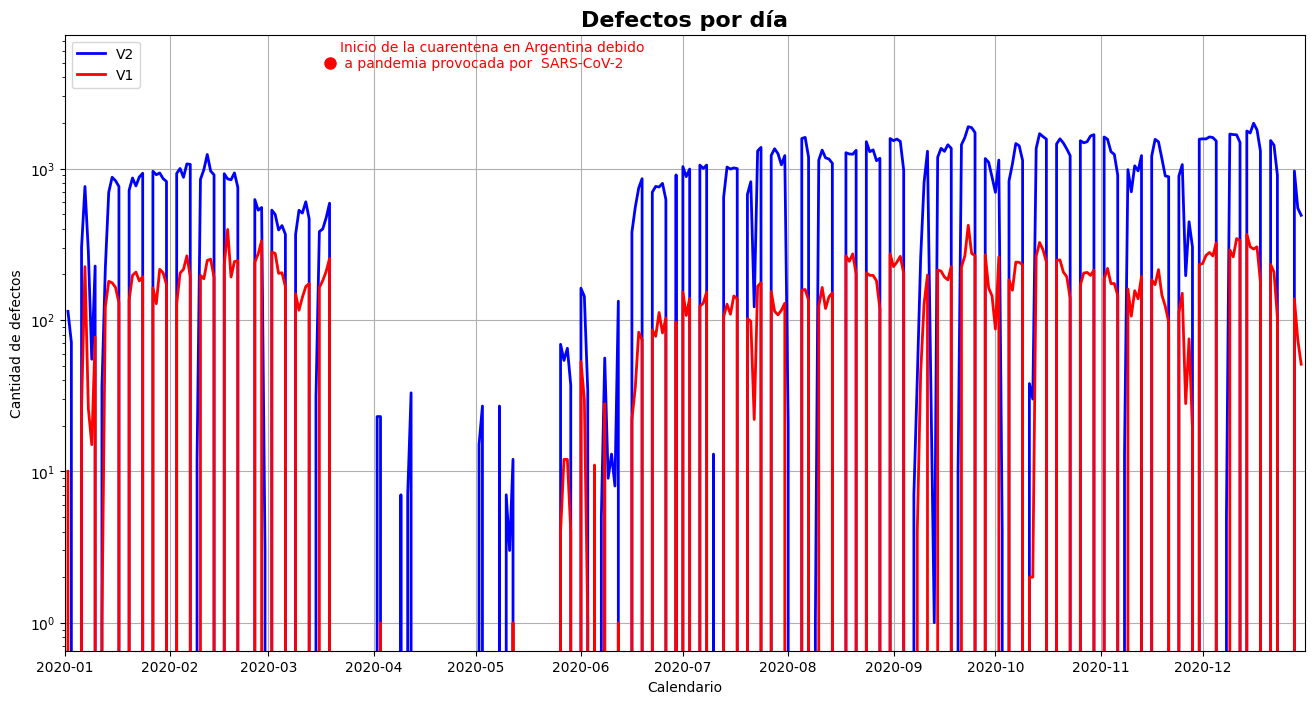

In [156]:
# Set size
fig = plt.figure(figsize=(16,8))

# Get axes
ax = plt.gca()

# Set title
ax.set_title('Defectos por día', fontsize=16, fontweight='bold')

# Set labels
ax.set_xlabel('Calendario')
ax.set_ylabel('Cantidad de defectos')

#ax.text(3, 4, 'Random Noise', bbox={'facecolor': 'grey', 'alpha': 0.5, 'pad': 10})
#ax.text(date_time_obj, 4.1, 'No continuous trend observed', color='red')

ax.plot(get_timeplot('2020-03-19'), 5000, marker='o', c='red', markersize=8)
ax.text(covid_quarantine_texttime, 4660, 'Inicio de la cuarentena en Argentina debido \n a pandemia provocada por  SARS-CoV-2', color='red')

# Plot
ax.semilogy(total.index.to_pydatetime(), total.V2, c='blue', linewidth=2, label='V2')
ax.semilogy(total.index.to_pydatetime(), total.V1, c='red', linewidth=2, label='V1')
#ax.semilogy(total.index.to_pydatetime(), smooth(total.V2, 2), c='green', linewidth=2, label='salgov')

plt.xlim([get_timeplot('2020-01-01'), get_timeplot('2020-12-31')])
plt.grid()
plt.legend(loc="upper left")
# Show
#ax.plot()
#ax.set_yscale('log')
#plt.scatter(total.index.to_pydatetime(), total.V2)
#plt.scatter(total.index.to_pydatetime(), total.V1)
#plt.plot(total.index.to_pydatetime(), total.V1, logy=True)

<AxesSubplot:xlabel='DECL'>

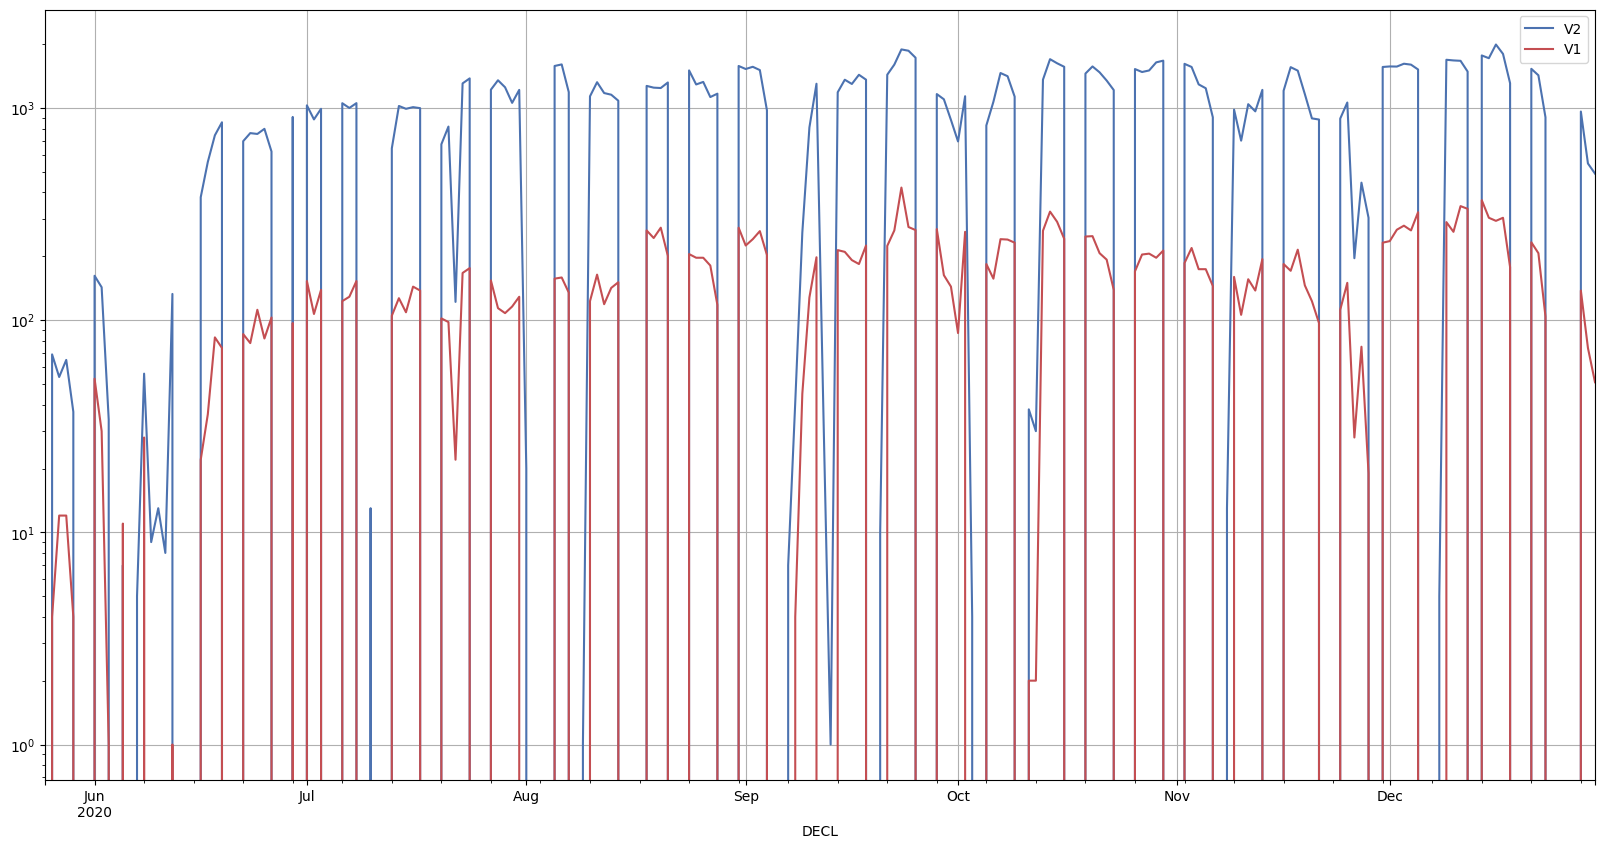

In [105]:
total['2020-05-25':'2021-01-01'].plot(logy=True, figsize=(20,10), grid=True, color=['b','r'])

In [75]:
# Group by week, gravity and audit
test = df.groupby([df.index.isocalendar().week, df['GVD'], df['AUDI']]).count()
audi_gvt = test['ID'].unstack(level=-1).unstack(level=-1).fillna(0)

In [76]:
# Group by week, gravity and type
test = df.groupby([df.index.date, df['GVD'], df['TIPO']]).count()
audi_tipo = test['ID'].unstack(level=-1).unstack(level=-1).fillna(0)

In [79]:
audi_gvt.astype(int)

AUDI CAPS       DPU       PESD      SAVES    
GVD    V1  V2    V1    V2   V1   V2    V1  V2
week                                         
1       0   0    10   185    0    0     0   0
2       2  13   368  1585    0   65     0   0
3       0   0   770  3300    2   86     0   0
4       0   0   911  4083    3   78     0   0
5       0  18   880  4381    3   78     0   7
6       0   6  1005  4903    1   31     0  14
7       0  33  1071  4843    2   51     1  15
8       0  22  1303  4204    3   59     1  24
9       1  13   846  1631    0   58     0   9
10      0   9  1129  2151    1   28     0  21
11      1  25   744  2395    0   65     1  19
12      0  13   810  1787    0   30     0  15
14      0   8     0     0    1   38     0   0
15      0  21     0     0    0   26     0   0
18      0   6     0     0    0   36     0   0
19      0  15     0     0    0   19     0   0
20      0   3     0     0    1   12     0   0
22      0   0    32   225    0    0     0   0
23      0   8    95   308    0   35     0   0
24      0  22    29   185    0   12     0   0
25      0   0   215  2523    0   15     0   0
26      0   0   461  3607    0   30     0   0
27      1   1   494  3735    1   78     0   0
28      0  22   405  3082    0   19     0   0
29      0  20   623  4640    0   10     0   0
30      0   9   565  4263    0   15     0  15
31      1  11   619  6014    1   73     0  24
32      0   5   451  4346    0   10     0  14
33      0   7   698  5855    0    0     1  14
34      0  10   982  5019    1   41     0  13
35      0  14   898  6373    0   22     0  12
36      0  10  1204  7121    0   11     1  16
37      0  14   373  2399    1   39     1   2
38      2  23  1021  6536    2   74     0  19
39      0  25  1449  8398    2   74     1  22
40      0  31   924  4880    0   54     0  15
41      0   3  1054  5898    2   44     0   0
42      0  20  1122  6234    2   28     0   0
43      0  10  1036  7053    0    0     0   0
44      3  38   987  7757    0   30     0   0
45      0   3   898  6581    0   45     0   0
46      0  16   749  4817    5   78     0   0
47      0  17   935  7004    1  187     0   0
48      1   8   383  2811    0   80     0   0
49      1  12  1600  9314    1   73     0  43
50      0   9  1230  6458    0   32     1  28
51      1  11  1443  8475    2   68     2  37
52      0   4   541  3789    2   46     1  24
53      0   1   263  1952    0   33     0  16

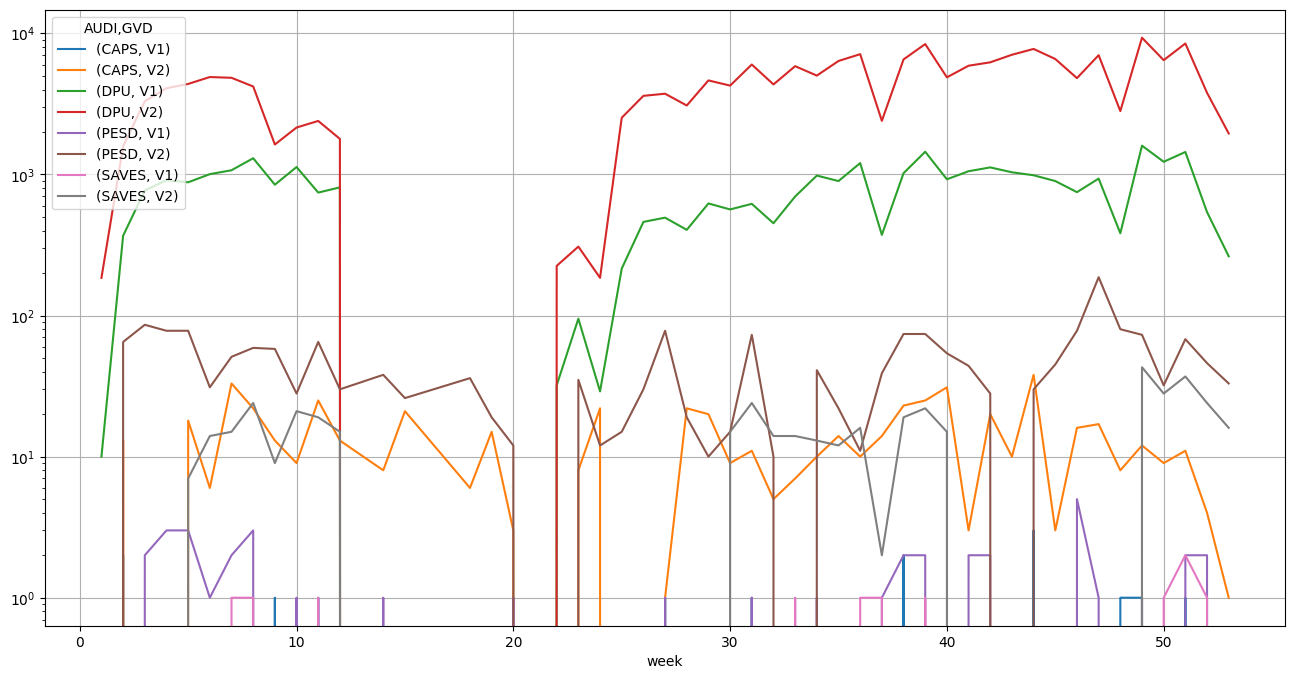

In [160]:
plt.style.use('default')
ax = audi_gvt.plot(logy=True, figsize=(16,8), grid=True)
fig = ax.get_figure()
fig.savefig("output.png")

In [77]:
test = df.groupby([df.index.hour, df['DPTO']]).count()
dftoxhs = test['ID'].unstack(level=-1).fillna(0)

In [78]:
dftoxhs = dftoxhs.astype(int)

<AxesSubplot:xlabel='DPTO', ylabel='DECL'>

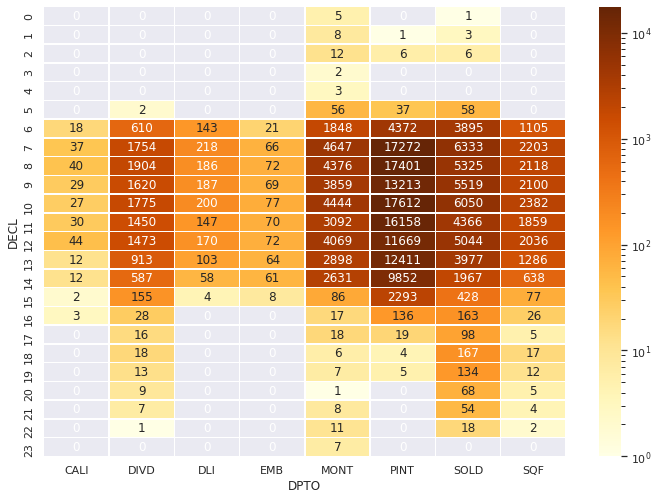

In [89]:
sns.heatmap(dftoxhs, norm=LogNorm(), annot=True, cmap='YlOrBr', linewidths=.5, fmt='d')

In [382]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
